# Extraction de Keywords

## Imports

In [1]:
import os
import yake
import requests
import collections
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import sys
from nltk.corpus import stopwords
from IPython.display import Image
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from collections import Counter
from wordcloud import WordCloud
from collections import defaultdict
from spacy.lang.fr.examples import sentences
from bs4 import BeautifulSoup
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer



In [2]:
nltk.download('stopwords')
!python -m spacy download fr_core_news_md
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ---------------------------------------- 45.8/45.8 MB 6.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


2024-12-22 23:37:24.522832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 23:37:26.433679: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab 

True

## Extraire les mots clés d'un document avec Yake

In [3]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=1000)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../../data/txt/"         
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [5]:
# Imprimer le nombre de fichiers identifiés
len(files)

1001

In [6]:
files[:1000]

['BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt',
 'BE-KBR00_15463334_19611101_32_00_00_0_01_0035_29133524.txt',
 'BE-KBR00_15463334_19660101_49_00_00_0_01_0074_29142174.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0016_29128000.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0023_29128007.txt',
 'BE-KBR00_15463334_19700401_65_00_00_0_01_0051_29151819.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0017_29572262.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0019_29572264.txt',
 'BE-KBR00_15463334_19740701_83_00_00_0_01_0023_29580695.txt',
 'BE-KBR00_15463334_19781001_99_00_00_0_01_0039_29589982.txt',
 'BE-KBR00_15463334_19791101_103_00_00_0_01_0031_29592394.txt',
 'BE-KBR00_15463334_19820601_111_00_00_0_01_0035_29684278.txt',
 'BE-KBR00_15463334_19870601_127_00_00_0_01_0009_29693273.txt',
 'BE-KBR00_15463334_19871201_128_00_00_0_01_0047_29695113.txt',
 'KB_JB1051_1921-10-22_01-00004.txt',
 'KB_JB1051_1922-03-04_01-00004.txt',
 'KB_JB1051_1922-04-29_01-00004.txt',


In [7]:
files[:50]

['BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt',
 'BE-KBR00_15463334_19611101_32_00_00_0_01_0035_29133524.txt',
 'BE-KBR00_15463334_19660101_49_00_00_0_01_0074_29142174.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0016_29128000.txt',
 'BE-KBR00_15463334_19691201_64_00_00_0_01_0023_29128007.txt',
 'BE-KBR00_15463334_19700401_65_00_00_0_01_0051_29151819.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0017_29572262.txt',
 'BE-KBR00_15463334_19720301_73_00_00_0_01_0019_29572264.txt',
 'BE-KBR00_15463334_19740701_83_00_00_0_01_0023_29580695.txt',
 'BE-KBR00_15463334_19781001_99_00_00_0_01_0039_29589982.txt',
 'BE-KBR00_15463334_19791101_103_00_00_0_01_0031_29592394.txt',
 'BE-KBR00_15463334_19820601_111_00_00_0_01_0035_29684278.txt',
 'BE-KBR00_15463334_19870601_127_00_00_0_01_0009_29693273.txt',
 'BE-KBR00_15463334_19871201_128_00_00_0_01_0047_29695113.txt',
 'KB_JB1051_1921-10-22_01-00004.txt',
 'KB_JB1051_1922-03-04_01-00004.txt',
 'KB_JB1051_1922-04-29_01-00004.txt',


In [8]:
# Choisir un fichier
this_file = files[30]
this_file

'KB_JB1051_1924-12-26_01-00004.txt'

In [9]:
chaine = 'KB_JB1051_1924-12-26_01-00004.txt'
type(chaine)

str

In [10]:
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB1051', '1924-12-26', '01-00004.txt']

In [11]:
date = chaine_split[2]
date_split = date.split('-')
year = date_split[0]

In [12]:
year[1]

'9'

In [13]:
year[:2]

'19'

In [14]:
year[0]

'1'

In [15]:
all_years = [str(year) for year in range(1831, 1960)]

In [17]:
print(f"Il y a {count_decade['1914s']} fichiers pour la décennie 1914s")

Il y a 0 fichiers pour la décennie 1914s


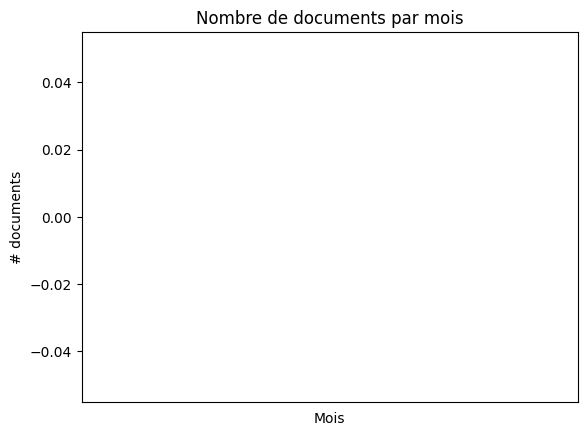

In [18]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=20)
plt.title('Nombre de documents par mois')
plt.show()

In [19]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"LE DRAPEATJ ROTJQ-E Pour ramélioration de la vie des travailleurs dans TU. R. S. S. B.ECTIFICATION Dana noire article de vendredi passé: < L'amélioraition d'existence des travailleurs russes », une erreur s'est glissée qui doit être rectifiée. La tableau des salaires payés dans les lifférentes professions en juillet 1924 indique de*, salaires en « tchervontsi » et une note sig^île que « le tchervonietz équivaut à un peu plus de 10 francs >, il s'agit de salaires établis en rcnlblcs-or, et c'est "

In [20]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('DRAPEATJ ROTJQ-E', 0.013991898003772743),
 ('chômeurs', 0.015800306175102304),
 ('travailleurs', 0.022669255620851255),
 ('travaux', 0.024418441786781986),
 ('rue', 0.025903638820296667),
 ('travaux publics', 0.026207444904771594),
 ('heures', 0.026407266753825615),
 ('Bruxelles', 0.02664121769132724),
 ('jour', 0.037191169402275764),
 ('logement', 0.0375543421541641),
 ('construction', 0.0404757695765288),
 ('francs', 0.0432271162645339),
 ('logement ouvrier', 0.04377976832910525),
 ('logements', 0.04381339917985813),
 ('coopératives', 0.043850138829269185),
 ('ROTJQ-E Pour ramélioration', 0.046472607774376805),
 ('Mme Boulanger', 0.04669638027957251),
 ("qu'ils", 0.04686755316533357),
 ('maisons', 0.04689994030652834),
 ('nombre', 0.04762157173839114),
 ('cours', 0.04890632786620612),
 ('roubles', 0.04893991243790459),
 ('crime', 0.04964773511045645),
 ('Mme', 0.04967730913535167),
 ('ouvrières', 0.0502099496040449),
 ('Piérard', 0.050305603263065296),
 ('Travail', 0.0524044933695

In [21]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['DRAPEATJ ROTJQ-E',
 'travaux publics',
 'logement ouvrier',
 'Mme Boulanger',
 'maisons ouvrières',
 'logements ouvriers',
 'local habituel',
 'François Lamal',
 'B.ECTIFICATION Dana',
 'Dana noire',
 'Mlle Moortgat',
 "l'assurance sociale",
 'collectivités productrices',
 'logements insalubres',
 'COMMUNISTES Bruxelles',
 'grands centres',
 'coopératives ouvrières',
 'subsides alloués',
 'EDITIONS SOCIALISTES',
 'travailleurs russes',
 "L'amélioraition d'existence",
 'PARTI FEDERATION',
 'cités ouvrières',
 'Bruxelles Dimcnche',
 'Bruxelles Adm.',
 'PRESSE COMMUNISTE',
 'centres industriels',
 'Victorine Fauville',
 'Parquet fut',
 'Mme Eulalie',
 'groupe vendredi',
 'Arthur Piérard',
 "nombre s'est",
 'rue Lefrancq',
 'parti communiste',
 'grand nombre',
 'Soviets lutte',
 'EOOURS Ouvrier',
 'Secoure ouvrier',
 'chômeurs travaillent',
 'chômeurs payent',
 'chômeurs jouissent',
 'FEDERATION BRUXELLOISE',
 'habitant rue',
 'Maison Syndicale',
 'cordialement invités',
 "d'un rouble",


In [22]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

BE-KBR00_15463334_19590401_22_00_00_0_01_0063_29132195.txt mentions these keywords: presse soviétique, PRESSE INDIENNE, PRESSE OFFICIELLE, RUSSES PREPARENT, Mme Fourtseva, journaux soviétiques, journaux russes, presse modernes, presse n'est, Presse manquait, principaux journaux, journaux n'ont, Press Registrar, Praesi dium, vingt-trois rédacteurs, villes russes, Alexandre Baulin, journaux occidental, soviétique actuelle, semaine dernière, dirigeants russes, vingt-trois principaux, propagande publiés, grands quotidiens, chef réunis, n'ont publié, compte rendu, INDIENNE L'Office, grand nombre, grandes villes, nouveaux périodiques, périodiques indiens, communiqués officiels, officiels qu’ils, théori cien, journal officiel, grande place, tirage total, sévèrement attaqué, point spécialisés, qu’ils finissent, ressembler davantage, bulletins ministériels, ministériels qu'à, fois pompeux, simples reproductions, rabâchent d'ailleurs, vérités élémentaires, élémentaires connues, vulgarisation sci

In [23]:
data_path = "../../data/txt/"

In [24]:
DECADE = '1830'

In [25]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [26]:
# Exemple de fichiers
files[:700]

['KB_JB555_1831-02-23_01-00003.txt',
 'KB_JB555_1831-03-08_01-00003.txt',
 'KB_JB555_1831-07-11_01-00002.txt',
 'KB_JB555_1833-04-18_01-00004.txt',
 'KB_JB555_1834-01-03_01-00004.txt',
 'KB_JB555_1834-11-05_01-00004.txt',
 'KB_JB555_1834-11-15_01-00004.txt',
 'KB_JB555_1837-09-21_01-00001.txt',
 'KB_JB555_1839-07-02_01-00001.txt']

In [27]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [28]:
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [29]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [30]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\acer\Desktop\tac\tac\.env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
tfidf_array = tfidf_vectors.toarray()

In [32]:
N_CLUSTERS = 4

In [33]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [34]:
clusters = km_model.fit_predict(tfidf_vectors)

In [35]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [36]:
pprint(dict(clustering))

{0: ['KB_JB555_1831-02-23_01-00003.txt',
     'KB_JB555_1831-03-08_01-00003.txt',
     'KB_JB555_1831-07-11_01-00002.txt'],
 1: ['KB_JB555_1834-01-03_01-00004.txt'],
 2: ['KB_JB555_1833-04-18_01-00004.txt',
     'KB_JB555_1834-11-05_01-00004.txt',
     'KB_JB555_1834-11-15_01-00004.txt'],
 3: ['KB_JB555_1837-09-21_01-00001.txt', 'KB_JB555_1839-07-02_01-00001.txt']}


In [37]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [38]:
reduced_vectors[:500]

array([[-0.31023565, -0.15112572],
       [-0.39858105, -0.40008728],
       [-0.36279657, -0.43908574],
       [ 0.54562593, -0.06228983],
       [ 0.04756381,  0.10164341],
       [ 0.54790637, -0.09904732],
       [ 0.45248272, -0.01683438],
       [-0.2843478 ,  0.45185638],
       [-0.23761776,  0.61497048]])

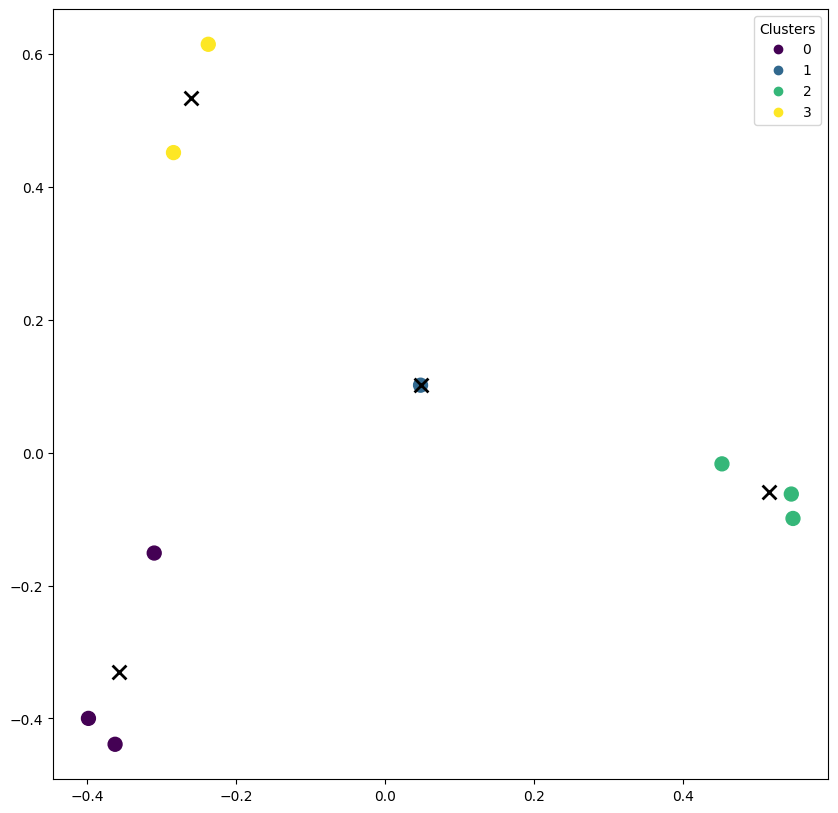

In [39]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### Stopwords

In [40]:
sw = stopwords.words("french")
sw += ["laquelle", "riga", "mares", "vues", "tudor","ment","dura","egri","bref",
       "reuter","shillings","westminster","nish","icie","balkans", "aller","house",
       "ferree","vive","tsar","national","gang","austro","sud","delà","monastir","effet",
       "point","austro","vallée","doute","mares","août","toute","aller","dura","vue","prennent",
       "double","afin","effet","très","uhlans","tudor","elles","aller","avant","suite","riga","autre",
       "cinq", "côtes","moins","toujours","heure","être","permis","voie","long","grande","main","chef",
       "bientôt","soir","composer","dire","aussi","peut","fois","alliés","grâce","bonne","ici","serbe",
       "gand","temps","camille","faire","exposé","dit","sans","entre","procurer"]
sw = set(sw)


In [41]:
year = 1915

In [42]:
data_path = "../../data/txt/"
txt_path = 'txt'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and str(year) in f]
len(txts)

1

In [43]:
content_list = []
for txt in txts:
    with open(os.path.join(data_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [44]:
len(content_list)

1

### Afficher nuage de mots

In [45]:
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [46]:
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:700]

'SCème année. ROYAUME-UNI « ONE PENNY l ENDANCE No. 249 KIEILCSE. CONTINENT : 15 CENTIMES. (HOLLANDE : S CENTS.) ADMINIS-TRATTON ET REDACTION: TUDOR HOUSE. TUDOR ST.. LONDON. E.C. TELEPHONE: CITY 3960. BUREAU A PARIS : PLACE DE LA BOURSE. I 31 1-5 7 et 1238-75. TELEPH.: LONDRES, JEUDI 21 OCTOBRE 1915. ABONNEMENTS: , 3 MOIS, 9 SHILLINGS. . J 6 MOIS. 17 SHILLINGS. 1 1 AN, 32 SHILLINGS. . CoNSERVATiqN PAR LE PROGRÈS. SOMMAIRE. LA SITUATION : La résistance serbe. — La question des com» munica tions. — L\'attitude de la Roumanie et de la Grèce. — Les opérations en Russie. — Avance allemande vers Riga. Un anniversaire. — L\' "Indépendance Belge." Vive I\' "Indépendance Belge ["—Camille Roussel. Le sal'

In [47]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [48]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1915_clean.txt!'

In [49]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:700]

'SCÈME ANNÉE ROYAUME UNI ONE PENNY ENDANCE KIEILCSE CONTINENT CENTIMES HOLLANDE CENTS ADMINIS TRATTON REDACTION LONDON TELEPHONE CITY BUREAU PARIS PLACE BOURSE TELEPH LONDRES JEUDI OCTOBRE ABONNEMENTS MOIS MOIS CONSERVATIQN PROGRÈS SOMMAIRE SITUATION RÉSISTANCE QUESTION COM MUNICA TIONS ATTITUDE ROUMANIE GRÈCE OPÉRATIONS RUSSIE AVANCE ALLEMANDE VERS ANNIVERSAIRE INDÉPENDANCE BELGE INDÉPENDANCE BELGE ROUSSEL SALUT GAZETTE LETTRE GRÈCE BILLET PARISIEN JEAN BERNARD SCÈNES TYPES FRONT BELGE LOUIS PIÉRARD ECHOS ETC SITUATION JEUDI MIDI INFORMATIONS RELATIVES OPÉRATIONS SERBIE CONFUSES PARFOIS CONTRADICTOIRES LÉGATION LONDRES ANNONCE TROUPES SERBES CONTINUENT RÉSISTER SUCCÈS ENNEMI DEUX FRONTS MALG'

In [50]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BELGE', 22), ('INDÉPENDANCE', 18), ('JOURNAL', 18), ('TROUPES', 12), ('PLUS', 12), ('CET', 10), ('BELGIQUE', 9), ('COMME', 8), ('VERS', 7), ('COMMUNICATIONS', 7)]


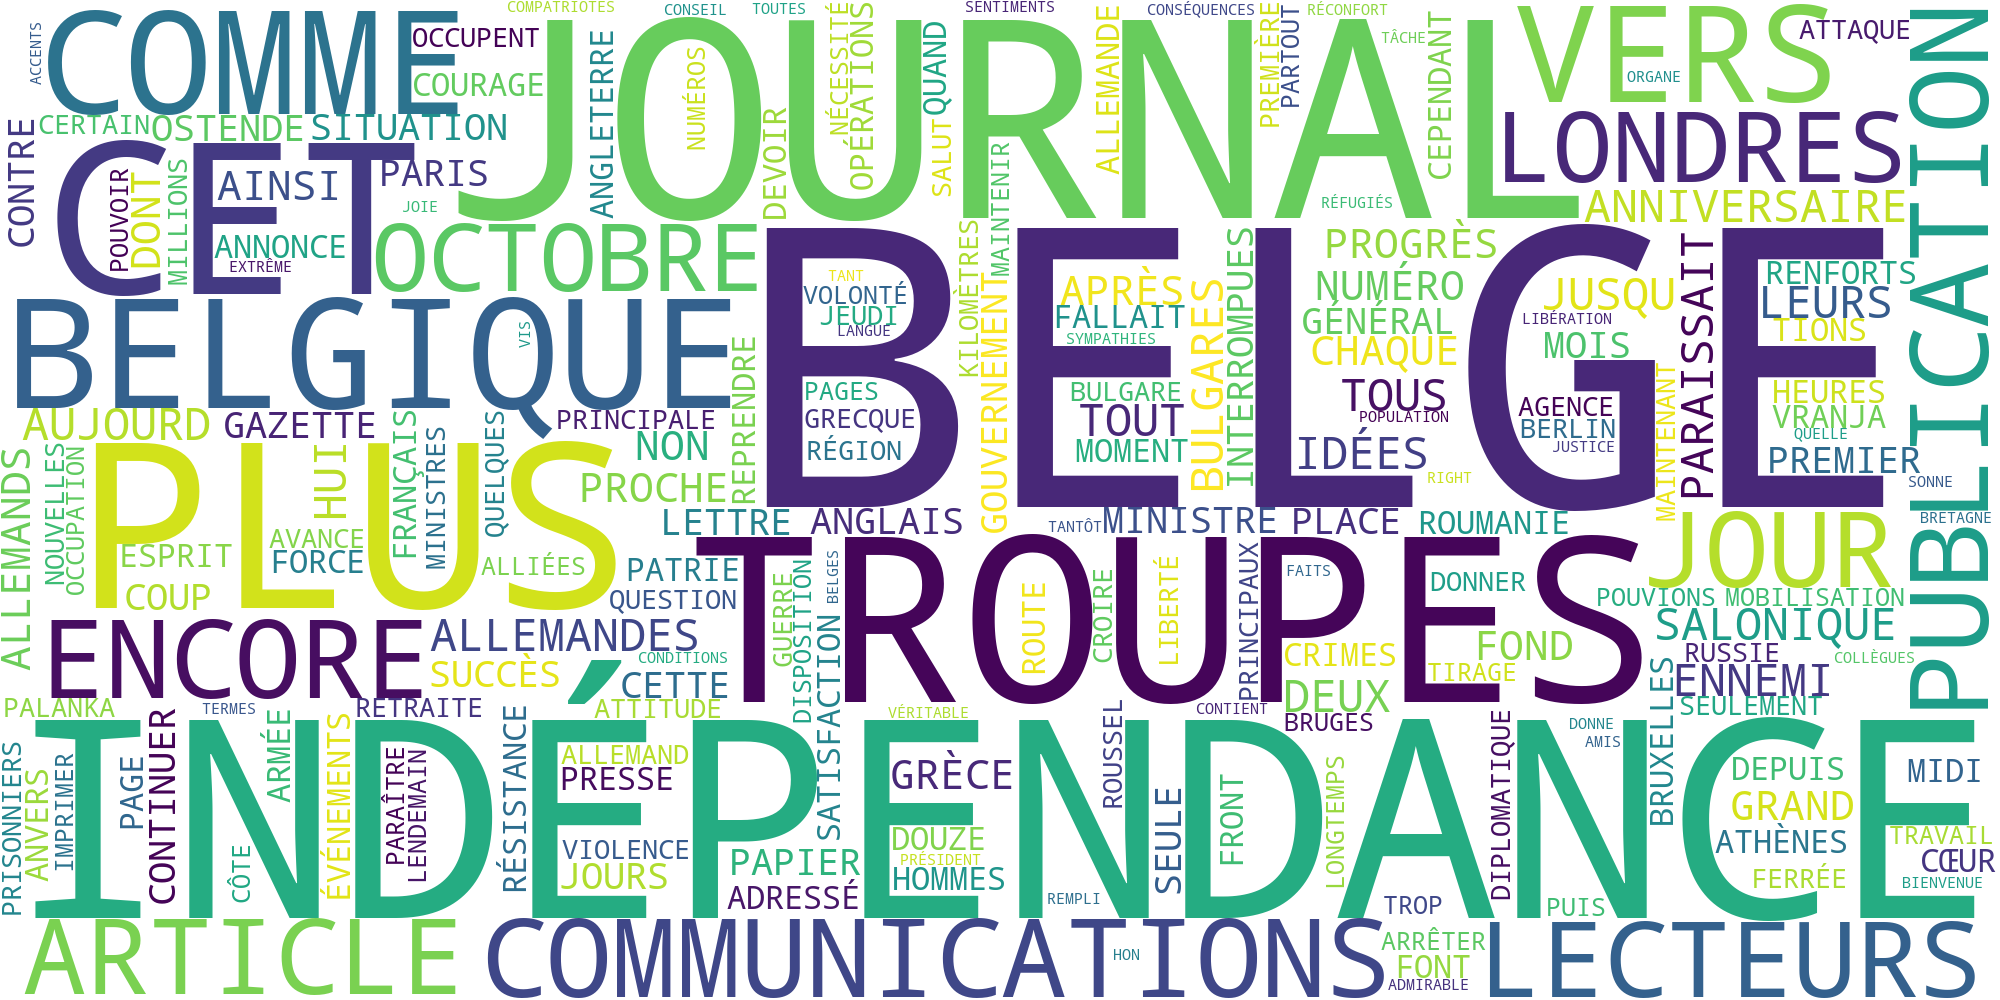

In [51]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

### Sapcy 

In [52]:
n=1000000
text = open("../../data/all.txt", encoding='utf-8').read()[:n]

In [55]:
nlp = spacy.load('fr_core_news_md')

In [56]:
doc = nlp(text)

In [95]:
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        people[ent.text] += 1

In [96]:
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Bruxelles apparait 171 fois dans le corpus
Paris apparait 122 fois dans le corpus
Belgique apparait 53 fois dans le corpus
Anvers apparait 51 fois dans le corpus
rue de la Madeleine apparait 37 fois dans le corpus
Nord apparait 33 fois dans le corpus
Liège apparait 32 fois dans le corpus
Bourse apparait 30 fois dans le corpus
Londres apparait 30 fois dans le corpus
Russie apparait 26 fois dans le corpus
Gand apparait 23 fois dans le corpus
rue Royale apparait 22 fois dans le corpus
Ixelles apparait 18 fois dans le corpus
Charleroi apparait 18 fois dans le corpus
SOIR apparait 18 fois dans le corpus
Vienne apparait 17 fois dans le corpus
Monnaie apparait 17 fois dans le corpus
Autriche apparait 16 fois dans le corpus
Allemagne apparait 16 fois dans le corpus
France apparait 16 fois dans le corpus
Coucher apparait 15 fois dans le corpus
Etat apparait 15 fois dans le corpus
Brux apparait 15 fois dans le corpus
la France apparait 15 fois dans le corpus
Angleterre apparait 15 fois dans le c

In [85]:
print (people)

defaultdict(<class 'int'>, {'et.en province': 1, 'frie d’Isabelle': 1, 'Aubert': 1, 'Auber': 2, 'Aristogiton': 1, 'depuil Brutus': 1, 'Cassius': 1, 'navecmernt': 1, 'notrrJ temps': 1, 'Louvel': 3, 'duc de Berry': 1, 'Louvois': 1, 'envic': 1, 'Louis-Philippe': 2, 'Morey': 2, 'Pépin': 3, 'cetté époque': 1, 'Fieschi': 1, "Ctus ’Héros 'et üe»": 1, 'Jacques Clément': 1, 'Henri III': 1, 'Dieuoutragé': 1, 'Liorsquo Louvel': 1, 'leûttc de Berry': 1, 'Bcmaparte': 1, 'Orsini': 1, 'étre fe{5': 1, 'George Cadoudal': 1, 'jjyu': 1, 'Cadoudal': 1, 'Prcnyer Consul': 1, 'lier Consul': 1, 'Breton': 1, 'Napoléon III': 2, 'Aubcrtin': 1, 'otmmne facétieux': 1, 'Ràfâiliâc': 1, 'Joseph Martin': 1, 'Auguste Orts': 2, 'M. Desseille': 1, 'Ave-et-Auffe': 1, 'médaille dè i re classo': 1, 'MM. Stenuit': 1, 'De Wdegenaerc': 1, 'MM. Hequet': 1, 'Bruyer': 1, 'Yaiiliolstraele': 1, 'Vandcrstraetcn': 1, 'Samyn': 1, 'Barbier': 1, 'Thys': 1, 'Van Haudenhovc': 1, 'Alvin': 1, 'H. Hoorikx': 1, 'M Ue': 1, 'Stroobant': 1, 'Fan

### Model Word2vec

In [73]:
bigram_phrases = Phrases(sentences)

In [62]:
len(bigram_phrases.vocab.keys())

288

In [63]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [65]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [66]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [68]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [74]:
print(corpus[:100])

['Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars', "Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs", "San Francisco envisage d'interdire les robots coursiers sur les trottoirs", 'Londres est une grande ville du Royaume-Uni', 'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe', "Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon", "La France ne devrait pas manquer d'électricité cet été, même en cas de canicule", 'Nouvelles attaques de Trump contre le maire de Londres', 'Où es-tu ?', 'Qui est le président de la France ?', 'Où est la capitale des États-Unis ?', 'Quand est né Barack Obama ?']


In [75]:
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

In [76]:
model = Word2Vec.load("../../data/newspapers.model")

In [78]:
model.wv["guerre"]

array([ 4.2516356 , -3.9575698 , -1.2374973 , -2.5879688 , -6.569422  ,
       -3.5893786 ,  5.891296  , -1.898998  , -4.281797  ,  1.3586988 ,
        3.7005286 , -0.6140791 , -2.1921349 , -0.48017696, -2.2585225 ,
        1.9873887 , -6.995486  , -3.1535623 , -0.5909173 , -7.1638036 ,
        2.1526396 , -0.92902833, -2.7180343 ,  1.4578278 , -4.6420646 ,
        0.9122503 ,  3.9468794 , -0.99514556, -2.2910912 , -2.61285   ,
       -4.8714046 , -1.4754056 ], dtype=float32)

In [79]:
model.wv.similarity("guerre", "injustice")

0.549677

In [82]:
model.wv.most_similar("combattant", topn=20)

[('soldat', 0.8596639633178711),
 ('grenadier', 0.8461875915527344),
 ('genie', 0.8179571628570557),
 ('drapeau', 0.8094806671142578),
 ('massacre', 0.804540753364563),
 ('bagne', 0.7950661182403564),
 ('detachement', 0.7855232357978821),
 ('diocese', 0.7825427651405334),
 ('bourreau', 0.7738270163536072),
 ('ionnaire', 0.7726324796676636),
 ('martyre', 0.7720764875411987),
 ('christ', 0.769384503364563),
 ('martyr', 0.7679926753044128),
 ('patriarche', 0.7655233144760132),
 ('vaisseau', 0.7638965249061584),
 ('prisonnier', 0.7638384699821472),
 ('generalissime', 0.7637267708778381),
 ('commandant', 0.7622964978218079),
 ('kaiser', 0.7610583901405334),
 ('maquis', 0.7601159811019897)]

In [83]:
print(model.wv.most_similar(positive=['guerre', 'independance'], negative=['belgique']))

[('injustice', 0.7626873850822449), ('esclavage', 0.7449209690093994), ('oppression', 0.7413874268531799), ('ignorance', 0.7377374172210693), ('hostilite', 0.7365080118179321), ('inaction', 0.7322689294815063), ('obeissance', 0.7310470342636108), ('equite', 0.7279167771339417), ('indifference', 0.7248438000679016), ('irresponsabilite', 0.7196835279464722)]
